In [12]:
import torch

In [13]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cpu


#prepare an Excel file
N= 100, x=-5000 ~ 5000, step 100, y=3*x^2 + 25*x + 580

In [14]:
from google.colab import files
uploaded = files.upload()

Saving MLP regression data.xlsx to MLP regression data (1).xlsx


In [15]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

MLP regression data.xlsx


In [16]:
import pandas as pd
df=pd.read_excel(fname)

In [17]:
df.head(5)

,x,y
0,-5000,74875580
1,-4900,71908080
2,-4800,69000580
3,-4700,66153080
4,-4600,63365580


In [18]:
df.columns

Index(['x', 'y'], dtype='object')

#Randomly pick 20 data (10 to train and 10 to test) to simulate sparse sampling

In [37]:
dfX = df[['x']]
dfY = df[['y']]

In [38]:
import numpy as np
X = np.array(dfX.values)
Y = np.array(dfY.values)

In [39]:
index = np.random.choice(X.shape[0], 20, replace=False)  

In [40]:
X1 = X[index]
Y1 = Y[index]

In [41]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X1, Y1, test_size=0.50, random_state=0)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(10, 1) (10, 1) (10, 1) (10, 1)


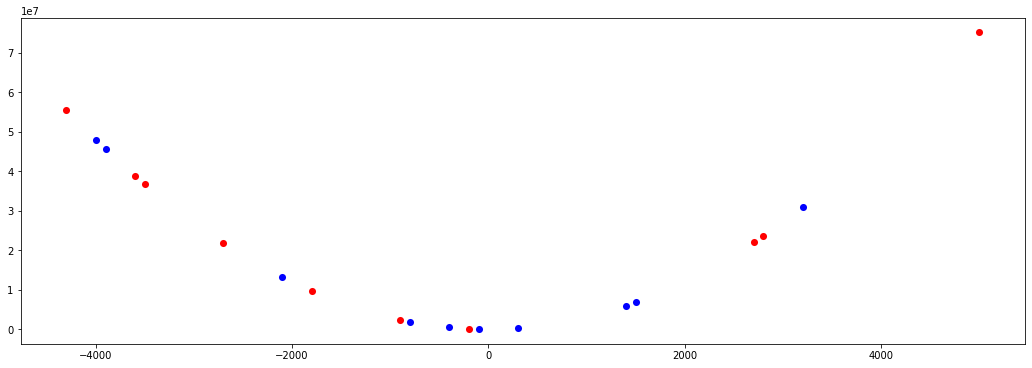

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
plt.scatter(trainX, trainY, s=50, lw=0, color = "blue")
plt.scatter(testX, testY, s=50, lw=0, color = "red")
plt.show()

# Build NN

In [43]:
import torch.nn as nn

In [44]:
MyNet = nn.Sequential(
    nn.Linear(1, 30),
    nn.ReLU(),
    nn.Linear(30, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
)


In [45]:
loss_func = torch.nn.MSELoss()

In [46]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# Train N epoches

In [47]:
tensorX = torch.FloatTensor(trainX).to(device)
tensorY = torch.FloatTensor(trainY).to(device)

In [52]:
lossLst = []
for epoch in range(1, 2000):
    tensorY1 = MyNet(tensorX)
    loss = loss_func(tensorY1, tensorY)
    loss1 = float(loss)
    #print("%.2f" % (loss1), end = ", ")
    lossLst.append(loss1)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

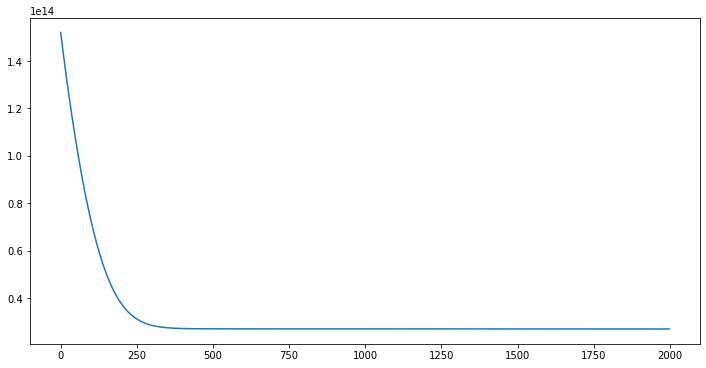

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

# Test 

In [54]:
tensorX = torch.FloatTensor(testX).to(device)
tensorY = torch.FloatTensor(testY).to(device)
tensorY1 = MyNet(tensorX)
loss = loss_func(tensorY1, tensorY)
print("%.2f" % (float(loss)), end = ", ")

150686494883840.00, 

In [55]:
testY1 = tensorY1.detach().cpu().numpy()

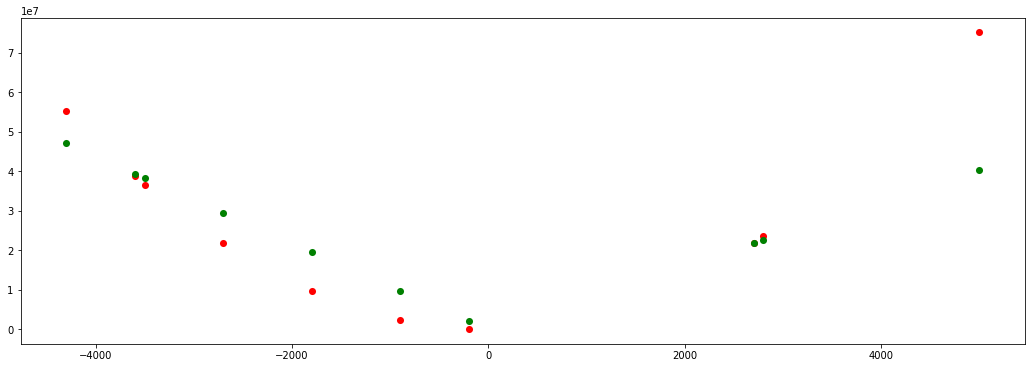

In [56]:
plt.figure(figsize=(18, 6))
plt.scatter(testX, testY, s=50, lw=0, color="red")
plt.scatter(testX, testY1, s=50, lw=0, color="green")
plt.show()